##### Import data

In [1]:
from util_copy import load_fabric_data, extract_label_grouping, extract_label_grouping, load_fabric_images
import numpy as np
from matplotlib import image

In [2]:

path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/label_json/**/**.json"

fids, fdata = load_fabric_data(path)
ftype1, ftype2 = extract_label_grouping(fdata)


In [3]:
path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/"
labels, imgs = load_fabric_images(path, fids, fdata, ftype2)

print(len(labels))
print(imgs[0])

n_samples = len(imgs)
print("Number of samples:", n_samples)

print(imgs[1230].shape)

C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/**/**.jpg
3371
[[[130 130 128 155 147 171]
  [139 137 138 151 150 168]
  [147 145 148 146 154 167]
  ...
  [ 57  46  24  92  87  29]
  [ 73  51  28  83  64  34]
  [124  89  69  76  47  51]]

 [[139 141 140 162 153 174]
  [143 144 146 157 155 168]
  [148 148 150 151 155 166]
  ...
  [ 69  61  38 121 124  69]
  [ 58  41  15 113 100  56]
  [ 69  39  15  88  63  33]]

 [[143 147 150 160 149 166]
  [145 149 152 156 153 162]
  [150 151 156 153 156 161]
  ...
  [102 100  75 153 160 116]
  [ 90  79  49 140 133  79]
  [ 75  55  22 126 106  47]]

 ...

 [[ 56  19  13  76  21  24]
  [ 55  16  11  77  28  31]
  [ 57  18  13  70  31  32]
  ...
  [208 213 219 210 213 206]
  [208 218 220 222 223 228]
  [200 210 211 216 213 234]]

 [[ 74  35  28 103  31  34]
  [ 69  30  23 103  37  39]
  [ 72  31  25  95  39  40]
  ...
  [191 200 209 212 212 212]
  [220 231 237 209 209 221]
  [196 210 213 213 210 237]]

 [[ 87  49  40 122  36  37]
  [ 82  42

##### Padding
- https://blog.csdn.net/wuzqChom/article/details/74785643
- https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
- https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

In [4]:
import cv2

In [5]:
imgs = [cv2.resize(img,(200, 200)) for img in imgs]

##### Split data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.3, random_state=1)

In [8]:
print("#Training data: {}\n#Testing data: {}\n#Class: {}".format(len(train_images), len(test_images), len(set(train_labels))))

#Training data: 2359
#Testing data: 1012
#Class: 9


##### Normalize data

In [9]:
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)
# train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
train_images.shape
print(test_labels)

[0 8 3 ... 7 4 4]


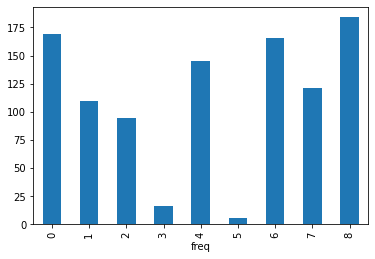

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'freq': test_labels})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

##### Generate fake data

In [12]:
import datetime
import numpy as np
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

##### Create model
- https://www.tensorflow.org/tutorials/images/classification

In [19]:
num_classes = 9

In [31]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(200,200,6), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(200,200,6,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
#lexNet.add(Dropout(0.1))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
#lexNet.add(Dropout(0.1))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
#lexNet.add(Dropout(0.1))

#Output Layer
AlexNet.add(Dense(9))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 50, 50, 96)        69792     
_________________________________________________________________
batch_normalization_36 (Batc (None, 50, 50, 96)        384       
_________________________________________________________________
activation_36 (Activation)   (None, 50, 50, 96)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 256)       614656    
_________________________________________________________________
batch_normalization_37 (Batc (None, 25, 25, 256)       1024      
_________________________________________________________________
activation_37 (Activation)   (None, 25, 25, 256)      

In [32]:


AlexNet.compile(optimizer= tf.keras.optimizers.Adam(0.0001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics=['accuracy'])

In [33]:
# start training
AlexNet.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
74/74 [==============================] - 303s 4s/step - loss: 1.5429 - accuracy: 0.5146 - val_loss: 1.9666 - val_accuracy: 0.2530
Epoch 2/10
74/74 [==============================] - 305s 4s/step - loss: 1.1162 - accuracy: 0.7198 - val_loss: 1.6819 - val_accuracy: 0.4881
Epoch 3/10
74/74 [==============================] - 302s 4s/step - loss: 0.9338 - accuracy: 0.8131 - val_loss: 1.5266 - val_accuracy: 0.5375
Epoch 4/10
74/74 [==============================] - 301s 4s/step - loss: 0.8634 - accuracy: 0.8296 - val_loss: 1.4276 - val_accuracy: 0.6176
Epoch 5/10
74/74 [==============================] - 349s 5s/step - loss: 0.7801 - accuracy: 0.8788 - val_loss: 1.4020 - val_accuracy: 0.6354
Epoch 6/10
74/74 [==============================] - 348s 5s/step - loss: 0.7219 - accuracy: 0.9008 - val_loss: 1.4002 - val_accuracy: 0.6413
Epoch 7/10
74/74 [==============================] - 330s 4s/step - loss: 0.6834 - accuracy: 0.9173 - val_loss: 1.3308 - val_accuracy: 0.6749
Epoch 8/10
74

##### Reason why accuracy doesn't further increase
1. imbalance of trianing set 
2. learning rate too large 

In [36]:
#plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')

test_loss, test_acc = AlexNet.evaluate(test_images,  test_labels, verbose=2)

32/32 - 22s - loss: 1.3341 - accuracy: 0.6423
